<a href="https://colab.research.google.com/github/xhesikam/WebtoonDataProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/webtoon_originals_en.csv")
df.head()

In [ ]:
df.describe()

In [ ]:
df = df.drop_duplicates()
len(df) #no duplicates

In [ ]:
df["weekdays"].unique()

In [ ]:
df.dtypes
df["weekdays"] = df["weekdays"].astype("string")
df.dtypes

In [ ]:
def day_fun(x):
  day_list = ["SUNDAY","MONDAY","TUESDAY","WEDNESDAY", "THURSDAY", "SATURDAY"]
  if x not in day_list:
    return "MULTIDAYS"
  else:
    return x

In [ ]:
df["days"] = df["weekdays"].apply(day_fun)
df

Choose 4 columns and do the following for each of these columns:
Plot the distribution of data in that column using an appropriate graph type.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice about the plot (ex. shape of distribution, outliers, skew, anything surprising, etc)


In [ ]:
df["length"].hist(bins=20)

In [ ]:
df["rating"].hist(bins=20)

<Axes: >

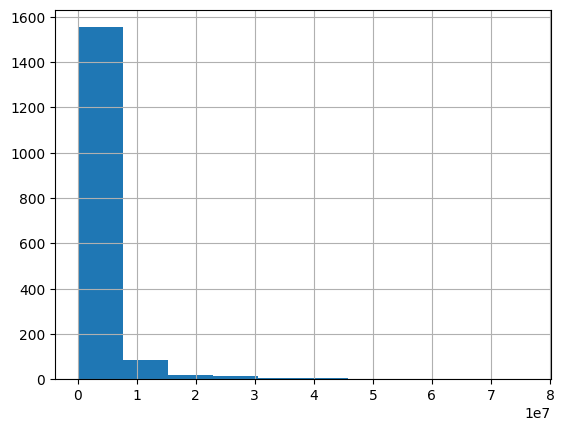

In [ ]:
df["likes"].hist()

<Axes: >

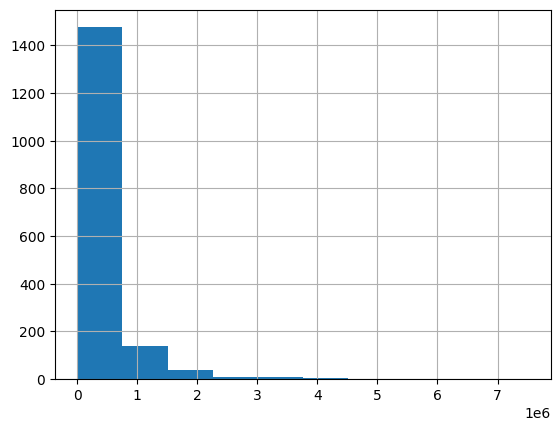

In [ ]:
df["subscribers"].hist()

Create 2 plots by doing the following for each:
Choose two or more columns/variables, and create a plot visualizing their relationship.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice or conclude from this plot.


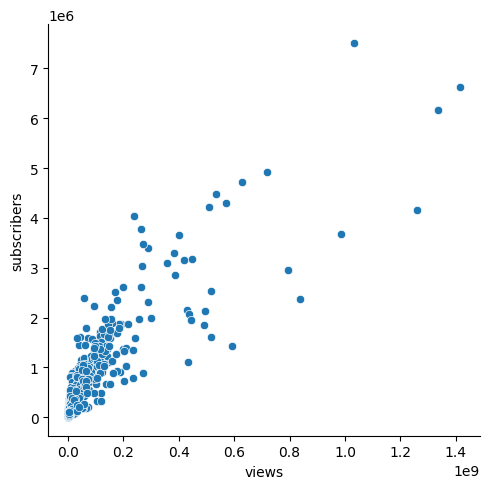

In [ ]:
import seaborn as sns
sns.relplot(x="views", y = "subscribers",data=df)